In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

df = pd.read_csv('../train_data_hand-gestures.csv')
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X.shape ,y.shape

((27455, 784), (27455,))

In [3]:
num_classes = len(np.unique(y))
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype('float32') / 255.0

X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32')
X_val = X_val.reshape((-1, 28, 28, 1)).astype('float32')

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes+1)
y_val = tf.keras.utils.to_categorical(y_val, num_classes+1)

In [36]:
from tensorflow.keras import layers, models, optimizers, Input
from tensorflow.keras.optimizers import Adam,SGD

model = models.Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes+1, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy',  metrics=['accuracy'])

model.summary()

print(X_train.shape, y_train.shape)
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val))
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy}')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,353 (888.10 KB)

 Trainable params: 227,161 (887.35 KB)

 Non-trainable params: 192 (768.00 B)

(21964, 28, 28, 1) (21964, 25)
Epoch 1/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.0543 - loss: 5.0760 - val_accuracy: 0.0528 - val_loss: 3.8544
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.0971 - loss: 3.1438 - val_accuracy: 0.0685 - val_loss: 6.0317
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.1514 - loss: 2.9068 - val_accuracy: 0.1202 - val_loss: 11.3248
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.2165 - loss: 2.6356 - val_accuracy: 0.2429 - val_loss: 16.9713
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.2909 - loss: 2.3496 - val_accuracy: 0.2774 - val_loss: 24.9173
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.3591 - loss: 2.0839 - val_accuracy: 0.3895 - val_loss: 28.8696
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.4336 - loss: 1.8247 - val_accuracy: 0.4125 - val_loss: 34.5948
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step 

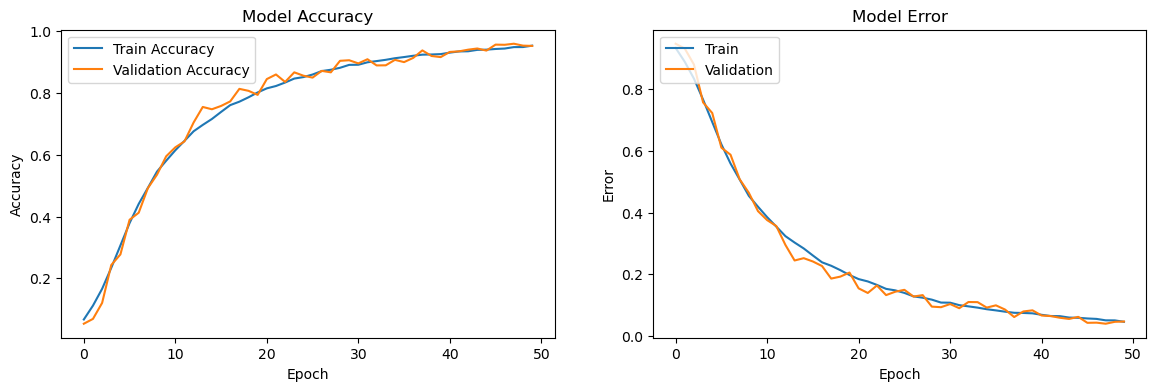

In [49]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

train_error = 1 - np.array(history.history['accuracy'])
val_error = 1 - np.array(history.history['val_accuracy'])

plt.subplot(1, 2, 2)
plt.plot(train_error, label='Train Error')
plt.plot(val_error, label='Validation Error')
plt.title('Model Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.savefig('cnn1', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
df_test = pd.read_csv('../test_data_hand-gestures.csv')
X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values
X_test = X_test.reshape((-1, 28, 28, 1)).astype('float32')
y_test = tf.keras.utils.to_categorical(y_test, num_classes+1)
X_test.shape ,y_test.shape

((7172, 28, 28, 1), (7172, 25))

In [42]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8599 - loss: 31.0334


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


<Figure size 1300x1300 with 0 Axes>

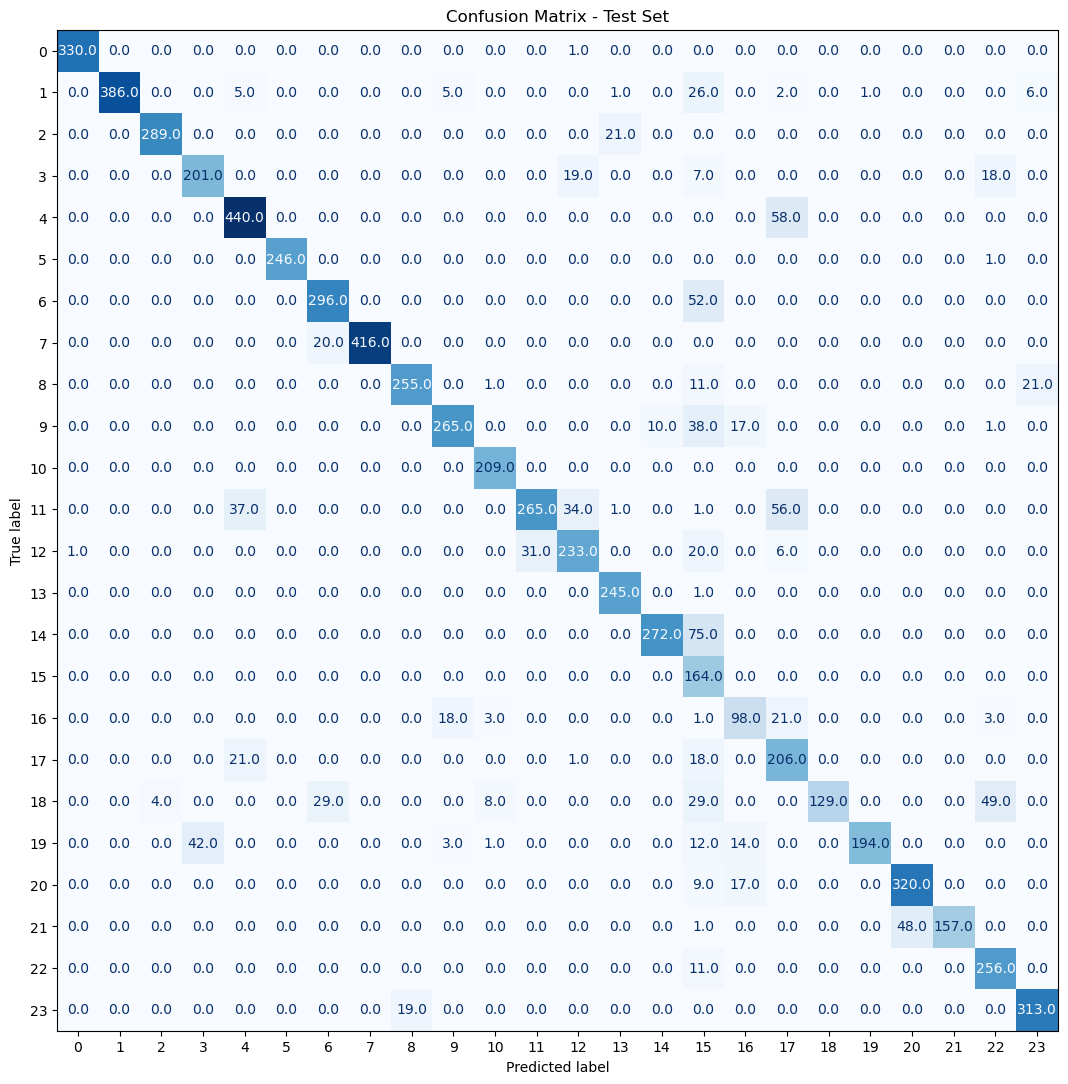

<Figure size 1300x1300 with 0 Axes>

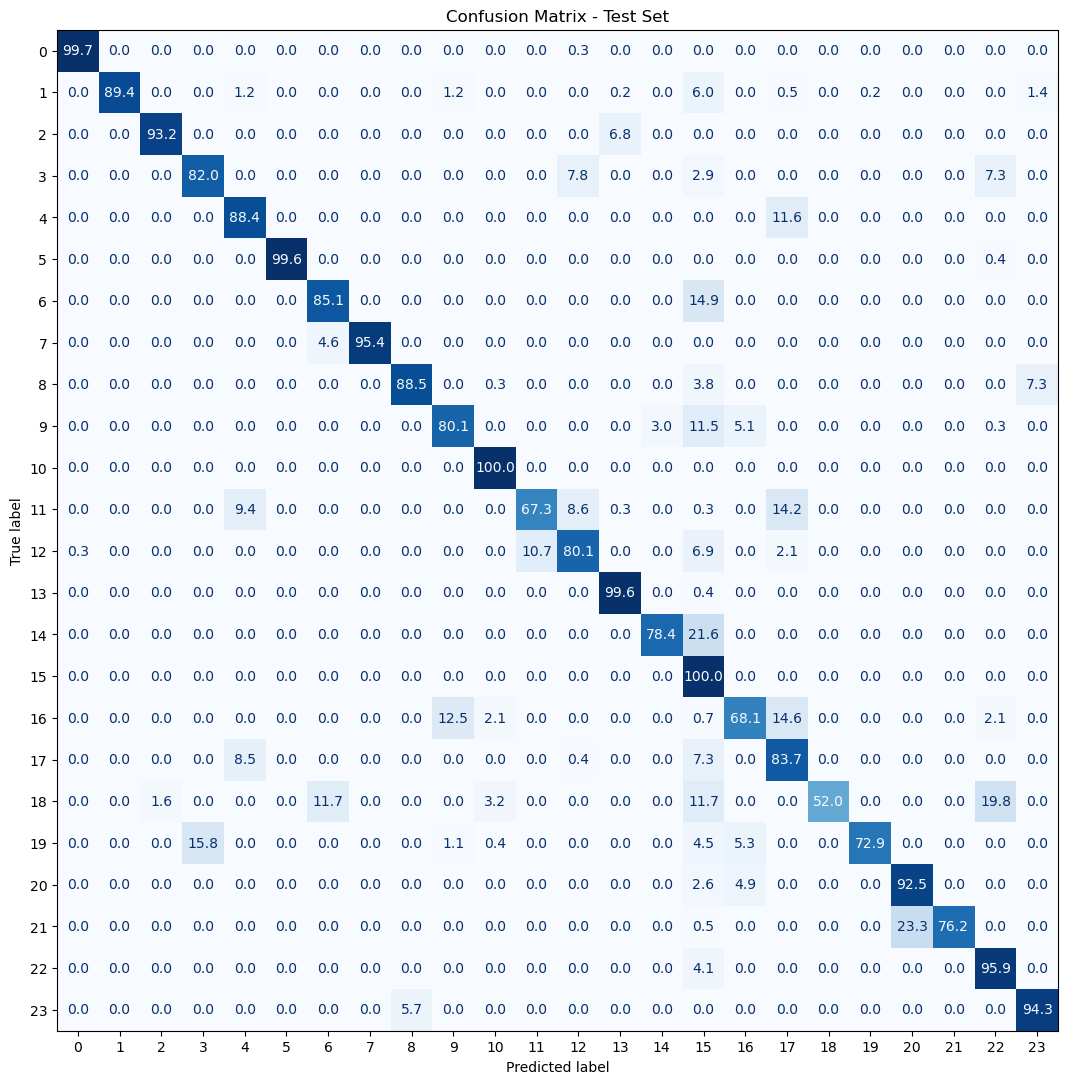

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)

cm_test = confusion_matrix(y_test_argmax, y_test_pred_classes)
cm_test_percent = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis] * 100

plt.figure()
plt.rcParams['figure.figsize'] = [13, 13]
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=np.arange(24))
disp_test.plot(cmap=plt.cm.Blues,colorbar=False , values_format='.1f')
plt.title('Confusion Matrix - Test Set')
plt.savefig('cnn1 cm', dpi=300, bbox_inches='tight')
plt.show()

plt.figure()
plt.rcParams['figure.figsize'] = [13, 13]
disp_test = ConfusionMatrixDisplay(cm_test_percent, display_labels=np.arange(24))
disp_test.plot(cmap=plt.cm.Blues,colorbar=False , values_format='.1f')
plt.title('Confusion Matrix - Test Set')
plt.show()

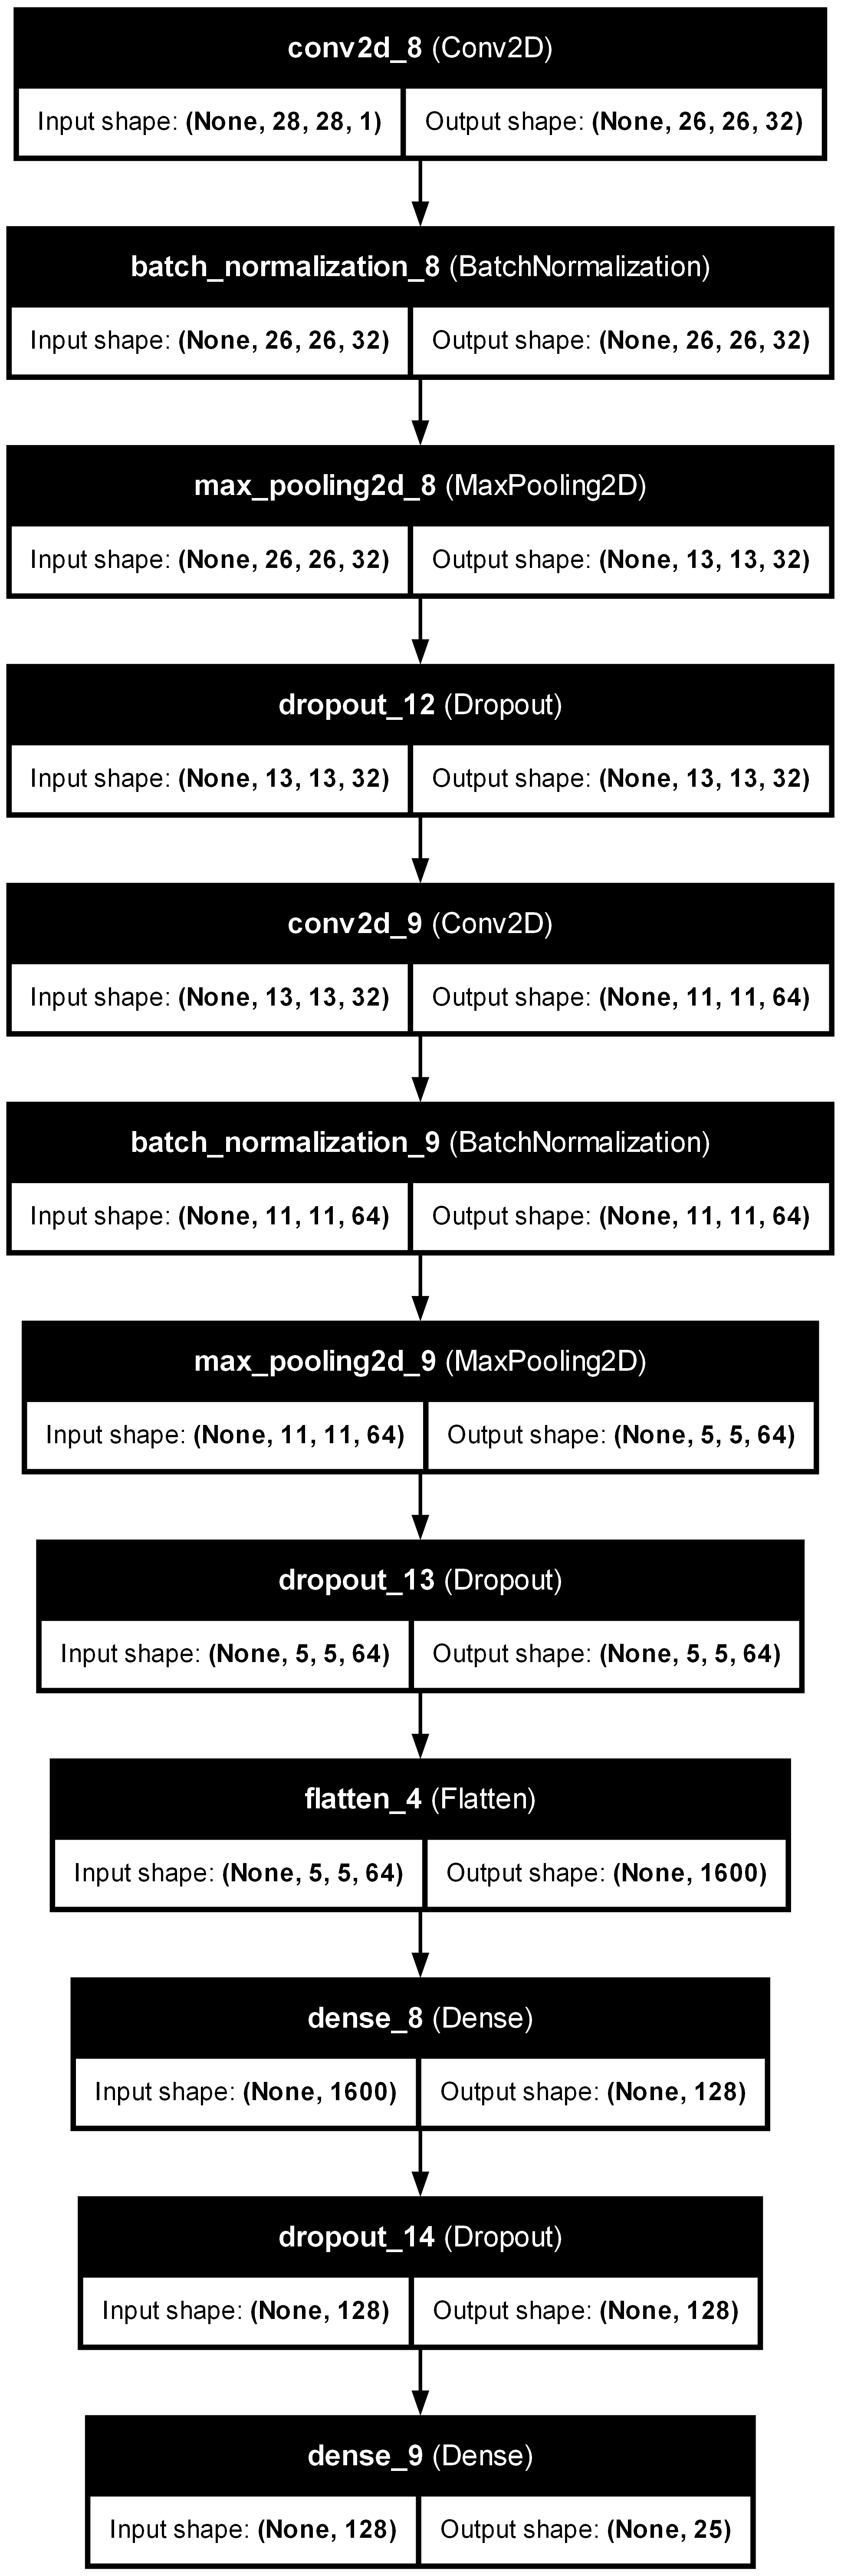

In [64]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True, dpi=300)